In [8]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

--- First 5 Rows of the Dataset ---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


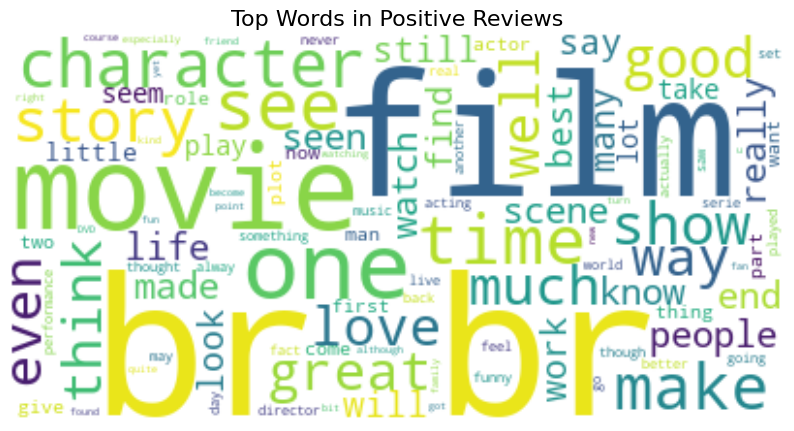

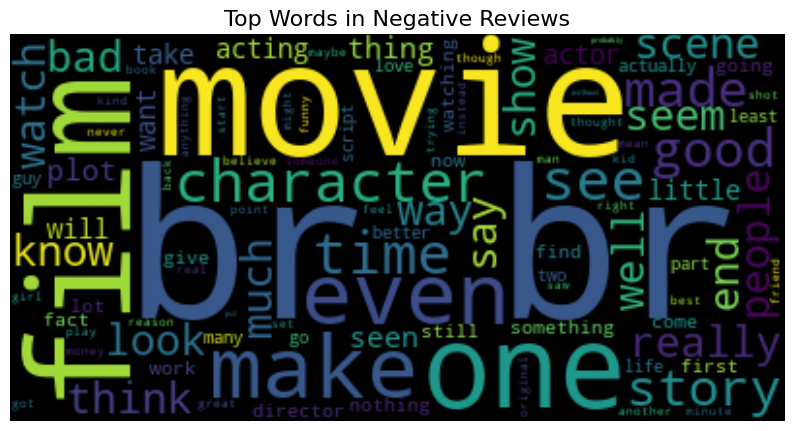

In [9]:
# =============================================================================
# # 2. DATA LOADING AND EXPLORATION
# =============================================================================
try:
    df = pd.read_csv('dataIMDB Dataset.csv')
except FileNotFoundError:
    print("Error: 'IMDB Dataset.csv' not found. Please download it from Kaggle and check the filename.")
    exit()

print("--- First 5 Rows of the Dataset ---")
print(df.head())

# --- EDA: Visualize with Word Clouds ---
# Word clouds are a great way to see the most frequent words in a body of text.
positive_reviews = df[df['sentiment'] == 'positive']['review']
negative_reviews = df[df['sentiment'] == 'negative']['review']

# Word cloud for positive reviews
plt.figure(figsize=(10, 7))
wc_positive = WordCloud(max_words=100, background_color='white').generate(' '.join(positive_reviews))
plt.title('Top Words in Positive Reviews', fontsize=16)
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis("off")
plt.savefig('positive_wordcloud.png') # Save for LinkedIn
plt.show()

# Word cloud for negative reviews
plt.figure(figsize=(10, 7))
wc_negative = WordCloud(max_words=100, background_color='black').generate(' '.join(negative_reviews))
plt.title('Top Words in Negative Reviews', fontsize=16)
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis("off")
plt.savefig('negative_wordcloud.png') # Save for LinkedIn
plt.show()

In [11]:
# =============================================================================
# # 3. DATA PREPARATION
# =============================================================================
# Define our features (X) and target (y)
X = df['review']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("--- Data Splitting ---")
print(f"Training set size: {len(X_train)} reviews")
print(f"Testing set size: {len(X_test)} reviews")

--- Data Splitting ---
Training set size: 35000 reviews
Testing set size: 15000 reviews


In [12]:
# =============================================================================
# # 4. BUILDING AND TRAINING THE NLP PIPELINE
# =============================================================================
# A Pipeline is a clean way to chain together data transformers and an estimator.
# Here, we combine the text vectorizer and the classifier.

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
# CountVectorizer parameters:
# stop_words='english': Removes common English words (like 'the', 'a', 'is').
# ngram_range=(1, 2): Considers both single words (unigrams) and pairs of words (bigrams).

# Train the entire pipeline on the training data
pipeline.fit(X_train, y_train)

print("--- NLP Pipeline Training Complete ---")

--- NLP Pipeline Training Complete ---


--- Model Evaluation ---
Accuracy Score: 0.90
Interpretation: The model correctly classified the sentiment of 90% of the movie reviews.

--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7500
    positive       0.90      0.91      0.90      7500

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



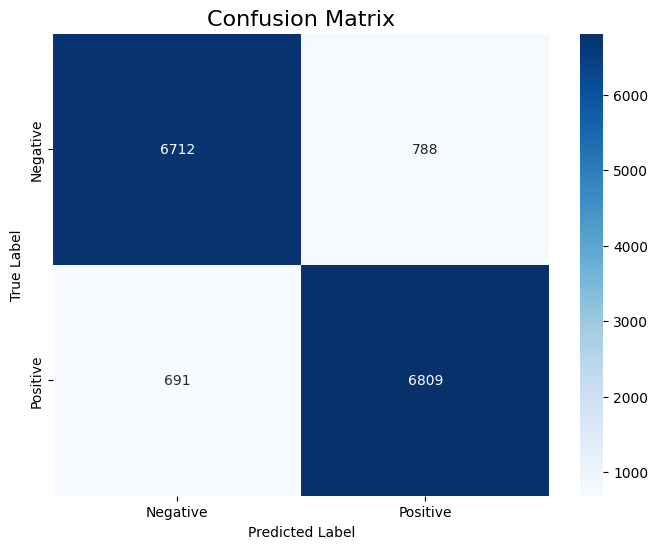



--- Testing with new reviews ---
Review: 'This movie was an absolute masterpiece, the acting was brilliant!'
Predicted Sentiment: POSITIVE

Review: 'I was so bored I fell asleep halfway through. A complete waste of time.'
Predicted Sentiment: NEGATIVE

Review: 'The plot was okay, but the ending was really disappointing.'
Predicted Sentiment: NEGATIVE



In [13]:
# =============================================================================
# # 5. MAKING PREDICTIONS & EVALUATING THE MODEL
# =============================================================================
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("--- Model Evaluation ---")
print(f"Accuracy Score: {accuracy:.2f}")
print(f"Interpretation: The model correctly classified the sentiment of {accuracy*100:.0f}% of the movie reviews.")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Example Prediction on New Data ---
print("\n" + "="*50 + "\n")
print("--- Testing with new reviews ---")
new_reviews = [
    "This movie was an absolute masterpiece, the acting was brilliant!",
    "I was so bored I fell asleep halfway through. A complete waste of time.",
    "The plot was okay, but the ending was really disappointing."
]

predictions = pipeline.predict(new_reviews)
for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: '{review}'\nPredicted Sentiment: {sentiment.upper()}\n")